In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [2]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [3]:
mask_path = "/Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/SegmentationClass"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in '/Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/SegmentationClass'...
['cat.6.png', 'dog.946.png', 'dog.952.png', 'cat.946.png', 'cat.952.png', 'cat.24.png', 'cat.30.png', 'cat.18.png', 'dog.22.png', 'dog.36.png', 'cat.2136.png', 'cat.2320.png', 'cat.2334.png', 'cat.2335.png', 'cat.2321.png', 'dog.37.png', 'dog.23.png', 'cat.19.png', 'cat.31.png', 'cat.25.png', 'cat.953.png', 'cat.7.png', 'cat.2296.png', 'cat.5.png', 'cat.945.png', 'cat.979.png', 'cat.33.png', 'cat.27.png', 'dog.35.png', 'dog.21.png', 'cat.2323.png', 'cat.2322.png', 'dog.20.png', 'dog.34.png', 'cat.26.png', 'cat.32.png', 'cat.944.png', 'cat.950.png', 'dog.944.png', 'cat.2097.png', 'dog.950.png', 'cat.987.png', 'cat.4.png', 'dog.954.png', 'cat.0.png', 'dog.968.png', 'cat.983.png', 'cat.968.png', 'cat.954.png', 'cat.36.png', 'cat.22.png', 'dog.30.png', 'dog.24.png', 'dog.18.png', 'cat.2332.png', 'cat.2327.png', 'cat.2333.png', 'dog.19.png', 'dog.2329.png', 'dog.25.png',

Finding unique colors: 100%|██████████| 358/358 [00:24<00:00, 14.47it/s]


Scan complete!
Found 3 unique classes.


{(np.uint8(0), np.uint8(0), np.uint8(0)): 0,
 (np.uint8(0), np.uint8(128), np.uint8(0)): 1,
 (np.uint8(128), np.uint8(0), np.uint8(0)): 2}

In [5]:
import numpy as np
import cv2
from PIL import Image

def encode_mask_to_grayscale(mask_path, color_map):
    """
    Converts an RGB segmentation mask to a grayscale mask with class labels.
    """
    mask_bgr = cv2.imread(mask_path)
    mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
    height, width, _ = mask_rgb.shape
    
    # Create an empty grayscale mask (height x width)
    mask_grayscale = np.zeros((height, width), dtype=np.uint8)
    
    # For each color in our map, find where it is in the mask and assign the label
    for color, label in color_map.items():
        # Find pixels matching the color
        matches = np.where(np.all(mask_rgb == color, axis=-1))
        mask_grayscale[matches] = label
        
    return mask_grayscale




In [19]:
import os
from PIL import Image

mask_dir = "/Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/SegmentationClass"
output_path = "/Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC"
output_dir = os.path.join(output_path, "encoded_mask")
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(mask_dir):
    if filename.endswith(".png"):  
        mask_path = os.path.join(mask_dir, filename)
        
        grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)
        grayscale_img = Image.fromarray(grayscale_label_mask.astype("uint8"))

        out_filename = os.path.splitext(filename)[0] + ".jpg"
        out_path = os.path.join(output_dir, out_filename)

        grayscale_img.save(out_path, format="JPEG")
        print(f"Saved {out_path}")


Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.6.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/dog.946.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/dog.952.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.946.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.952.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.24.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.30.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.18.jpg
Saved /Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/dog.22.jp

In [20]:
mask_path = "/Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/SegmentationClass/cat.1.png" 
grayscale_label_mask = encode_mask_to_grayscale(mask_path, COLOR_TO_LABEL)

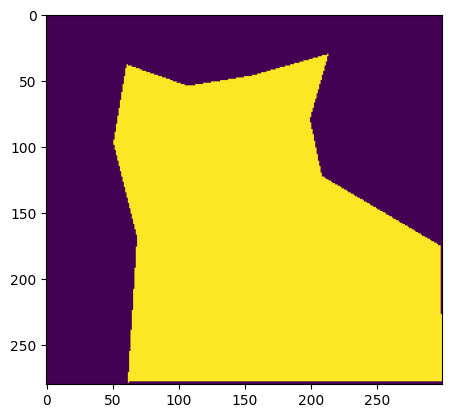

In [22]:
import matplotlib.pyplot as plt
save_path = "/Users/yebhonelin/Documents/github/Practical-ML-by-WAI/8_final_proj/Team YTK/VOC/encoded_mask/cat.1.jpg"

cv2.imwrite(save_path, grayscale_label_mask)
plt.imshow(grayscale_label_mask)

### Reread the encoded mask

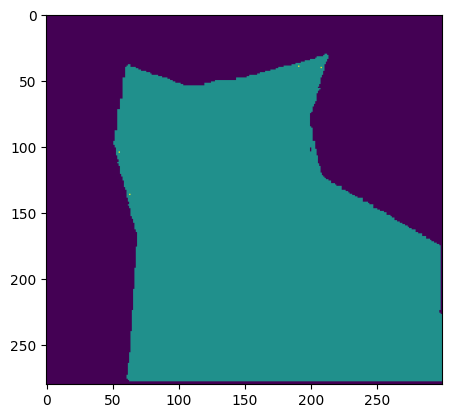

In [23]:

new_grayscale_label_mask = cv2.imread(save_path)
new_grayscale_label_mask = cv2.cvtColor(new_grayscale_label_mask, cv2.COLOR_BGR2GRAY)
plt.imshow(new_grayscale_label_mask)